In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, norm


df = pd.read_csv('/content/drive/MyDrive/Womakers/populacao_brasileira.csv.csv')

1. Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma
pessoa aleatória e ela não ser fluente em inglês. Considere fluente
quem tem o nível avançado.


In [4]:
prob_fluente = df[df['nível de proficiência em inglês'] == 'Avançado'].shape[0] / df.shape[0]
prob_nao_fluente = 1 - prob_fluente
print(f'Probabilidade de não ser fluente em inglês: {prob_nao_fluente:.4f}')

Probabilidade de não ser fluente em inglês: 0.6560


2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará,
qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [5]:
estados = ['AL', 'PA']
pessoas_filtro = df[(df['estado'].isin(estados)) & (df['renda'] > 5000)]
prob_renda_maior_5000 = pessoas_filtro.shape[0] / df[df['estado'].isin(estados)].shape[0]
print(f'Probabilidade de ter renda maior que 5 mil em Alagoas ou Pará: {prob_renda_maior_5000:.4f}')

Probabilidade de ter renda maior que 5 mil em Alagoas ou Pará: 0.0506


3. Descubra a probabilidade de uma pessoa ter ensino superior completo
no estado do Amazonas. Qual a probabilidade da quinta pessoa que
você conversar, que é amazonense, ter ensino superior completo?

In [6]:
prob_superior_amazonas = df[(df['estado'] == 'AM') & (df['escolaridade'] == 'Superior')].shape[0] / df[df['estado'] == 'AM'].shape[0]
prob_quinta_pessoa = prob_superior_amazonas ** 5
print(f'Probabilidade de ter ensino superior completo no Amazonas: {prob_superior_amazonas:.4f}')
print(f'Probabilidade da quinta pessoa ser formada no Amazonas: {prob_quinta_pessoa:.4f}')

Probabilidade de ter ensino superior completo no Amazonas: 0.2368
Probabilidade da quinta pessoa ser formada no Amazonas: 0.0007


4. Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de
probabilidade?

In [7]:
df['faixa_renda'] = pd.cut(df['renda'], bins=np.arange(0, df['renda'].max() + 1500, 1500))
faixa_mais_comum = df['faixa_renda'].mode()[0]
print(f'Faixa de renda mais comum: {faixa_mais_comum}')

Faixa de renda mais comum: (3000.0, 4500.0]


5. Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.


Média da renda: 3082.54
Variância da renda: 993156.23




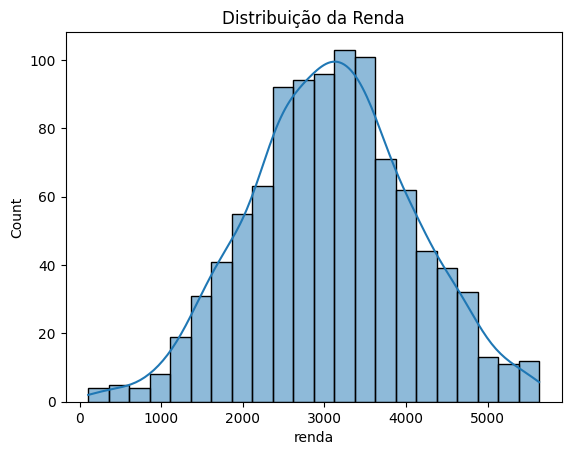

In [8]:
media_renda = df['renda'].mean()
variancia_renda = df['renda'].var()
print(f'Média da renda: {media_renda:.2f}')
print(f'Variância da renda: {variancia_renda:.2f}')
print("\n")
sns.histplot(df['renda'], kde=True)
plt.title('Distribuição da Renda')
plt.show()

6. Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra
de população brasileira com 1 milhão de habitantes, qual a
probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [22]:
prob_pos_graduacao = df[df['escolaridade'] == 'Pós-graduação'].shape[0] / df.shape[0]
prob_243mil = binom.pmf(243000, 1000000, prob_pos_graduacao)
print(f"A probabilidade é de {prob_243mil}")

A probabilidade é de 1.1104854289794913e-119


7. Somando as densidades nós temos a função de densidade acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.

In [15]:
escolaridade_counts = df['escolaridade'].value_counts(normalize=True).sort_index().cumsum()
print('Função de Densidade Acumulada para Escolaridade:')
print(escolaridade_counts)

Função de Densidade Acumulada para Escolaridade:
escolaridade
Fundamental      0.266
Médio            0.504
Pós-graduação    0.757
Superior         1.000
Name: proportion, dtype: float64


8. Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês
intermediário?

In [17]:
proporcao_intermediario = df[df['nível de proficiência em inglês'] == 'Intermediário'].shape[0] / df.shape[0]
n = df.shape[0]
erro_amostral = 1.96 * np.sqrt((proporcao_intermediario * (1 - proporcao_intermediario)) / n)
print(f'Margem de erro amostral: {erro_amostral:.4f}')

Margem de erro amostral: 0.0291


9. Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?


In [18]:
prob_renda_maior_media = norm.sf(media_renda + 1000, loc=media_renda, scale=df['renda'].std())
prob_60_pessoas = binom.pmf(60, df.shape[0], prob_renda_maior_media)
print(f'Probabilidade de encontrar 60 pessoas com renda mil reais superior à média: {prob_60_pessoas}')

Probabilidade de encontrar 60 pessoas com renda mil reais superior à média: 1.1597038406784442e-21


10. Qual a probabilidade de escolhermos alguém do Sudeste que seja
homem, com ensino fundamental e com renda maior que 2 mil reais por
mês?

In [21]:
sudeste_estados = ['SP', 'RJ', 'ES', 'MG']
filtro = df[(df['estado'].isin(sudeste_estados)) & (df['sexo'] == 'M') & (df['escolaridade'] == 'Fundamental') & (df['renda'] > 2000)]
prob = filtro.shape[0] / df[df['estado'].isin(sudeste_estados)].shape[0]
print(f'Probabilidade de escolher alguém do Sudeste, homem, com ensino fundamental e renda > 2 mil reais: {prob:.4f}')

Probabilidade de escolher alguém do Sudeste, homem, com ensino fundamental e renda > 2 mil reais: 0.1210
